# Régression logistique
---
## 1. Formulation mathématique

---
## 2. Un exemple en Python
### 2.1 Import des librairies et méthodes nécéssaires

In [1]:
# Modules math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Style
import seaborn as sns

# Modules pour la régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Sauvegarde du modèle
from joblib import dump, load

### 2.2 Initialisation / import des données 


Pour l'exemple, on prendra un dataset concernant les passagers du Titanic. L'objectif sera de prédire si un passager a survécu ou non en fonction de ses attribus (âge, sexe, genre, classe...). On se place dors et déjà dans un cas de **régression logistique multiple** (covariables avec modalités multiples ou covariables multi-classes). Pour comprendre comment fonctionne la régression logistique multplie, voir la régression multiple.

In [2]:
# Init
sns.set_style("darkgrid") # Style du graphe

df = sns.load_dataset('titanic') # Chargement des données

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


On va d'abord garder uniquement les colonnes qui sont utiles pour l'étude :

In [3]:
df = df[['survived', 'sex', 'age', 'pclass']]
df.head()

,survived,sex,age,pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


et retirer les lignes qui ont des données manquantes

In [4]:
df = df.dropna()

et enfin rendre la variable "sex" binaire

In [5]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df.head()

,survived,sex,age,pclass
0,0,1,22.0,3
1,1,0,38.0,1
2,1,0,26.0,3
3,1,0,35.0,1
4,0,1,35.0,3


### 2.3 Séparation des données de test et d'entraînement

Comme pour la régression linéaire, on sépare les données d'entraînement et de test :

In [6]:
X = df[['sex', 'age', 'pclass']] # Variables explicatives
y = df['survived'] # Variable dépendante

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Séparation 

### 2.4 Entraînement du modèle

In [7]:
model = LogisticRegression(max_iter=400) # Initialisation du modèle
model.fit(X_train, y_train) # Entraînement du modèle

LogisticRegression(max_iter=400)

Point important à remarquer : le modèle ne converge pas forcément, c'est pourquoi on fixe une limite d'itération avedc la commande `max_iter`.

### 2.5 Prédictions

In [8]:
y_pred = model.predict(X_test) # Prédictions
proba_pred = model.predict_proba(X_test)

### 2.6 Evaluation des performances du modèle :
#### 2.6.1 Matrice de confusion
Une matrice de confusion recense le nombre de faux positifs, faux négatifs, vrai positifs et vrai négatifs sous forme de tableau. Les éléments de cette matrice $2 \times 2$ veulent dire ceci : 

1. Vrai négatif (Réel 0, Prédit 0)
2. Faux positifs (Réel 0, Prédit 1)
1. Faux négatifs (Réel 1, Prédit 0)
2. Vrais positifs (Réel 1, Prédit 1)

La prédiction est la valeur que le modèle prédit tandis que réel est la valeur réelle, qui peut être observée à *posteriori*
Par exemple, une matrice de confusion peut ressembler à ça :

|             | Prédit : 0 | Prédit : 1 |
|-------------|------------|------------|
| **Réel : 0**   | 87         | 13         |
| **Réel : 1**   | 18         | 61         |
 
Ici, le modèle a prédit que 87 + 18 = 105 personnes n'ont pas survécues à l'accident sur les 87 + 13 = 100 personnes qui n'ont réellement pas survécues. De même, le modèle prédit que 13 + 61 = 74 personnes on survécues sur 10 + 61 = 71 qui ont réelement survécues.

#### 2.6.2 Scrore de précision (accuracy score)
Pour évaluer la performance d'une régression logistique, on utilise une mesure appelée *score de précision*. Cette mesure est liée à la matrice de confusion car c'est le rapport entre le nombre de prédictions correctes et le nombre de prédictions totales.

$$
Accuracy = \frac{VP + VN}{VP + VN + FN + FP} = 1 - exactitude
$$

Avec :

1. VP : Vrai négatif 
2. FP : Faux positifs
1. FN : Faux négatifs
2. VP : Vrais positifs

In [9]:
accuracy_score(y_test, y_pred)

0.8531468531468531

In [10]:
confusion_matrix(y_test, y_pred)

array([[69, 10],
       [11, 53]])

#### 2.6.3 Recall

#### 2.6.4 F1-Score

Pour rappel, on a un accuracy score de 0.85, ce qui montre que le modèle est performant. Attention cependant à vérifier si le modèle ne se base pas sur des classes déséquilibrées, par exemple, si les échantillons appartiennent à 90% à la même classe, le modèle sera entraîné à 90% sur cette classe. Pour cela, on utilise la courbe AUC-ROC.

#### 2.6.5 Courbe ROC

C'est la courbe représentative d'une fonction $f$ de $[0,1]$ dans $[0,1]$, supposée au dessus de la première bissectrice, i.e. :

$$
f(x) > x, \forall x \in [0,1]
$$

La courbe prend la proportion des informations prises par les échantillons pour la comparer à sa performance, ce qui veut dire qu'au fur et à mesure que la fonction se rapproche de 1, son image doit se rapprocher de 1 car la proportion de donnée considérée est plus grande. Si $f(1)$ est proche ou égal à 5, le modèle est aléatoire et plus $f(1)$ est proche de 1, plus le modèle est fiable. 

A cette courbe est joint un score (**AUC score**) qui mesure la capacité du modèle à distinguer les différentes classes. Pour rappel, une classe est une valeur d'une variable qui n'est pas un type date ou flottant. Par exemple, la variable "survived" comporte les classes 1 et 0. Pour le cas des variables multiclasses, comme "pclass", on a 1,2 et 3 par exmeple. **L'AUC-Score se mesure sur la variable dépendante $(Y)$ en comparant les valeurs réelles y_true et les variables prédites y_score.**

##### 2.6.5.1 Courbe ROC à classe binaire

In [11]:
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité d'appartenir à la classe 1
auc = roc_auc_score(y_test, y_proba)

float(auc)

0.8986352848101266

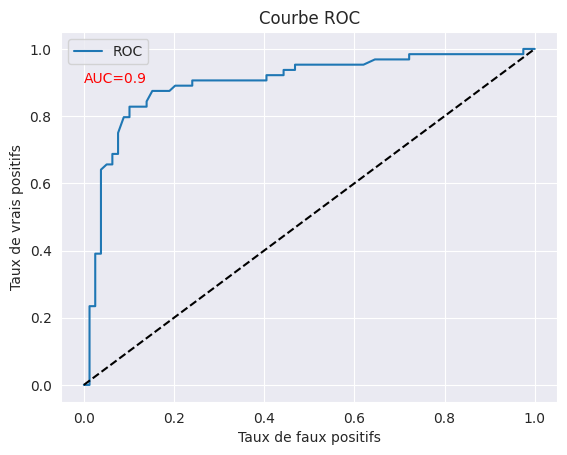

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="ROC")
plt.plot([0, 1], [0, 1], 'k--')  # ligne diagonale (modèle aléatoire)
plt.text(0, 0.9, 'AUC='+str(round(auc,ndigits=2)), color='red')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

##### 2.6.5.2 Courbe ROC multiclasses

### 2.7 Exemple de prédiction
Après avoir vérifié que le modèle était performant, on souhaite maintenant l'utiliser pour prédire si une personne aurait pu survivre ou non à l'accident. Prenons une femme de 25 ans en première classe :

In [13]:
exemple1 = np.array([[1, 25, 1]])  # sex=1 (femme), age=25, pclass=1 (1ère classe)
probability = model.predict_proba(exemple1) # Evaluation de la probabilité de survie de la personne

print(f"Probabilité de survie : {
    probability[0][1]*100:.2f
}%")

Probabilité de survie : 56.63%


/home/alexis/VSCode/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Maintenant un homme de 46 ans en 3ème classe :

In [14]:
exemple2 = np.array([[0, 46, 3]])  # sex=0 (homme), age=46, pclass=3 (3ème classe)
probability = model.predict_proba(exemple2) # Evaluation de la probabilité de survie de la personne

print(f"Probabilité de survie : {
    probability[0][1]*100:.2f
}%")

Probabilité de survie : 37.84%


/home/alexis/VSCode/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### 2.8 Déploiement du modèle 

Une fois avoir confirmé que le modèle est fiable, il reste à le déployer. Pour cela, on le sauvegarde pour pouvoir le redéployer dans un autre cas.

In [15]:
dump(model, 'RegressionLineaireSimple.joblib') # Enregistrement du modèle

['RegressionLineaireSimple.joblib']

Une fois le modèle sauvegardé, on peut le charger pour plus tard.

In [16]:
model = load('RegressionLineaireSimple.joblib') # Recharge du modèle
y_pred = model.predict(X_test) # Faire une prédiction

#### Procédures